## Section 7. Logistic Regression


## Objective
1. **분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. **
2. **실제로 구현하여 그 결과를 확인합니다.**

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. Iris Dataset 을 이용해 Iris 종 구별(classification)하기

* Iris 데이터는 4개의 features 을 가지고 있습니다.
    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 

* Iris 데이터는 labels 은 3가지 class로 나뉘어 집니다. 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
![Imgur](https://i.imgur.com/EO2cI4i.png)

### Requirements


1. [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) 을 이용해 
**Numpy** 을 이용해 **Iris setosa Vs Iris Versicolour** 을 구별하는 **logistic regression** 모델을 생성 합니다.
2. cost 와 Accuracy 을 측정 합니다. 
3. cost 와 Accuracy 을 시각화 합니다. 


In [2]:
# 아래 코드를 실행해 주세요
np.random.seed(1)
iris = load_iris()
xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name


ys = np.reshape(ys,newshape=(-1,1))
xs_ys = np.concatenate([xs,ys],axis=1)
iris_data = pd.DataFrame(xs_ys, columns=['sepal_length','sepal_width','petal_length','petal_width','label'])
bool_iris = iris_data.label < 2
iris_data = iris_data[bool_iris]
iris_data.describe()
#iris_data.plot(kind = 'hist')

#dataframe-> sample, describe, plot 

,sepal_length,sepal_width,petal_length,petal_width,label
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


#### 답안지 입력란
* 아래에 답을 서술하여 주세요


loss: 0.31350303904318516
accuracy : 1.0


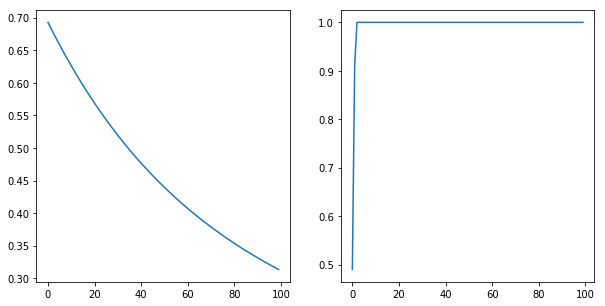

In [3]:
# 정답을 입력해 주세요

lr = 0.01

xs = iris_data.iloc[:, :-1]
ys_re = iris_data.iloc[:,-1]
ys_re = np.array(ys_re)
xs = np.array(xs)

#print(xs.min(axis=0))
xs = (xs - xs.min(axis=0))/(xs.max(axis=0) - xs.min(axis=0))
xs = (xs - xs.mean(axis = 0)) / xs.std(axis = 0) #point
#print(xs.std(axis=0))
ys = np.reshape(ys_re,(-1,1))
#print(xs.shape)
#print(ys.shape)

w= np.random.normal(loc = 0, scale = 0.01, size = (xs.shape[1]))
w = np.reshape(w,(-1,1))
#print(w.shape)

b = np.random.normal(loc = 0 , scale = 0.01, size = (w.shape[1]))

loss_list = []
w_list = []
w_list.append(w)
acc_list = []
for i in range(100) :
    mul = np.dot(xs,w)
    #print(mul.shape)
    
    mul_bias = mul + b
    #print(mul_bias.shape)

    prob = 1/(1 + np.exp(-mul_bias))
    #print('prob.shape',prob.shape)

    cross_entro = -(np.mean((ys*np.log(prob) + (1-ys)*np.log(1-prob))))
    loss_list.append(cross_entro)
    
    #acc 구현
    bool_ys = np.where(prob > 0.5, 1, 0) #
    acc = np.equal(ys, bool_ys).mean()
    acc_list.append(acc)
    #print("bool{}".format(bool_ys.shape))
    #print("ys{}".format(ys.shape))
    

    del_w  = np.mean((prob - ys)*xs, axis = 0) #미분식, prob - ys
    #print(del_w.shape)

    del_w = np.reshape(del_w, (-1,1))
    #print(del_w.shape)
    
    w = w - (lr*del_w)
    w_list.append(w)
    
fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1,2,1)
ax.plot(np.arange(0,100),loss_list)

ax = fig.add_subplot(1,2,2)
ax.plot(np.arange(0,100), acc_list)
print("loss: {}".format(loss_list[-1]))
print("accuracy : {}".format(acc_list[-1]))




#### 정답 확인
* Cost는 0.5 아래로 떨어져야 합니다.
* Accuracy는 100%가 나올 수 있습니다. 

아래와 같은 그림이 나오면 성공 입니다.


![Imgur](https://i.imgur.com/jVvhXnY.png)

In [0]:
<hr>

Copyright(c) 2019 by Public AI. All rights reserved.<br>
Writen by PAI, Sangjae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/02/22
<hr>